In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


In [2]:
def rect_pulse(A,fs,T,T_max=2): 
    r""" Generate isolated rectangular pulse with the following parameters
    Parameters: A : amplitude of the rectangular pulse 
    fs : sampling frequency in Hz 
     : duration of the pulse in seconds 
     Returns: 
     (t,g) : time base (t) and the signal g(t) as tuple 
     Example: 
     A = 1;
      fs=500;
      T = 0.2; 
      (t,g) = rect_pulse(A,fs,T) """ 
    t = np.arange(0,T_max,1/fs) # time base 
    rect = (t >0) * (t<T) + 0.5*(t==T) + 0.5*(t==0) 
    g = A*rect 
    return (t,g)

def impulse(A,fs,t_d,T_max=1):

  t,g = rect_pulse(A,fs,T=0.001,T_max=T_max)

  nSamples = int(fs*t_d)
  g = np.roll(g,nSamples)

  return (t,g)


def canal_linear(input,fs,aVec,tdVec):

  nSamplesInput = len(input)
  nEchos = len(aVec)

  y = np.zeros(nSamplesInput)

  for ii in range(nEchos):

    y = y + np.convolve(input,impulse(aVec[ii],fs,tdVec[ii])[1])[0:nSamplesInput]


  return y

def sinc(B,fs,t_d,T_max):

  t = np.arange(0,T_max,1/fs)
  return t, np.sinc(B*(t-t_d))


def canal_nao_linear(input,a,idx=2):

  return input + a*input**idx



<img src="https://github.com/araujoUnb/PricomAulas/blob/main/Figs/fga.png?raw=true" alt="isolated"/>


<h1 style="text-align: center;">Fundamentos de Transmissão</h1>

<h3 style="text-align: center;">Disciplina: Princípios de Comunicação</h3>


<p style="text-align: center;">Prof. Daniel C. Araújo</p>

## Conteúdo

1. Introdução 
2. Distorções em Transmissão
3. Tipos de distorção
4. Energia e Potência

<h1 style="text-align: center;">Introdução</h1>


## Sistemas Linear e Invariantes no Tempo

 - Sistemas LTI podem ser bem caracterizados no tempo

> Caracterização no tempo :         $$y(t) = \int _{-\infty}^{\infty} h (t - \tau) x(\tau)d\tau$$

em que, $h(t)$ é considerado o sistema, $x(t)$ é a entrada no mesmo e a saída do sistema é dado por $y(t)$ 

 - Sistemas LTI podem ser bem caracterizados no tempo

> Caracterização na frequência :   $$ Y(f) = H(f)X(f) $$

em que, 
$$
\begin{align*}
   Y(f) = \mathcal{F}[y(t)] \\
   X(f) = \mathcal{F}[x(t)] \\
   H(f) = \mathcal{F}[h(t)] \\
\end{align*}
$$

## Transmissão

 - Considerando o canal de transmissão como um sistema LIT é possível expressar o sinal recebido como:

$$ \begin{align*} 
Y(f)   &= H(f)X(f) \\
|Y(f)|e^{\jmath \theta _y(f)} &= |H(f)|e^{\jmath \theta _h(f)} |X(f)|e^{\jmath \theta _x(f)}
\end{align*}
$$
Portanto,
$$ \begin{align*} 
|Y(f)| &= |H(f)| |X(f)| \\
\theta _y(f) &= \theta _h(f) + \theta _x(f)
\end{align*}
$$

> O sinal recebido é uma versão de $x(t)$ com  a amplitude e fase do sinal alteradas.

<h1 style="text-align: center;">Distorções em Transmissão</h1>

## Transmissão sem distorção 

 - Quais as condições para que não haja distorção em uma transmissão?
 
 > O sinal recebido deve ser uma réplica do sinal transmitido. Ou seja, a forma de onda do sinal deve ser igual.


 - A condição de não-distorção é:

 $$
   y(t) = k x(t - t_d)
 $$

  - Representação na frequência: 

  $$
   Y(f) = k X(f)e^{-\jmath 2\pi f t_d}.
  $$

 Portanto,  

 $$
 H(f) = k e^{-\jmath 2\pi f t_d}
 $$
 
 > * Frequência angular : $\omega = 2\pi f$
 > * Atraso de grupo : $t_d = - \frac{1}{2\pi}\frac{d \theta(f)}{df}$ 
 > * Atraso de portadora : $t_p = -\frac{\theta(f_0)}{2\pi f_o}$ 


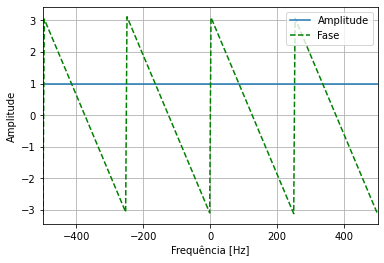

In [3]:
fs = 1e3         # frequência de amostragem
nSamples = 2**8  # número de amostras para plotar o sinal
td = 4*(1/fs)    # atraso de grupo em função do tempo de amostragem Ts = 1/fs

f = np.linspace(-fs/2,fs/2,nSamples)  # frequência analógica

Hf = np.ones(nSamples)
theta = -2*np.pi*f*td                 # rotação de fase na frequência para um atraso no tempo de td

plt.plot(f,Hf,label='Amplitude')
plt.plot(f,theta % (2*np.pi) -np.pi,'g--',label='Fase')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Amplitude')
plt.xlim([-fs/2,fs/2])
plt.legend()
plt.grid()
plt.show()

## Comentários sobre sistemas passa-tudo

 - Sistemas passa-tudo são sempre canais sem distoção? 
   > Não. Sistemas passa-tudo não implica em fase linear. 
   
   > É possível termos sistemas passa-tudo com fase não-linear.

## Exemplo

Considere um filtro RC passa-baixa com $R=10^3$ e $C = 10^{-9}$, cuja a entrada e a saída são $g(t)$ e $y(t)$, respectivamente. Determine a função de transferência $H(f)$, a fase e o atraso de grupo. Considere que para um transmissão sem distorção o requisito é que a amplitude na saída esteja dentro de 2\% e que o atraso de grupo esteja dentro 5\% de variação.


### Solução

$$
\begin{align*}
H(f) &= \frac{1/(\jmath 2\pi fC)}{R + 1/(\jmath 2\pi fC)} \\
    & = \frac{1}{1 + \jmath 2\pi f RC } \\
    & = \frac{a}{a+ \jmath 2\pi f }
\end{align*}
$$

em que $a = \frac{1}{RC} = 10 ^6$ 

Então:

$$
\begin{align*}
|H(f)| & = \frac{a}{\sqrt{a ^2+  (2\pi f)^2 }} \approx 1, \,\ |2\pi f| << a \\
\theta _h (f) &= - \arctan {\frac{2\pi f}{a}} \approx \frac{2\pi f}{a}, \,\ |2\pi f| << a 
\end{align*}
$$

Para acharmos o atraso de grupo basta derivar o $\theta _h (f)$: 
$$
\begin{align*}
t_d(f) &= -\frac{1}{2\pi}\frac{\partial }{\partial f}\theta _h (f)  \\
   & =  \frac{a}{a^2 +( 2\pi f)^2 } \\ 
   & \approx \frac{1}{a} , \,\ |2\pi f| << a   \\
   & \approx 10^{-6}
\end{align*}
$$

Para calcular a banda efetiva basta considerarmos $|H(B)|> 0.98$ e $t_d(B)> 0.95/a$

$$
|H(f)|  = \frac{a}{\sqrt{a ^2+  (2\pi f)^2 }} \geq 0.98
$$
e
$$
t_d(f)  = \frac{a}{a^2 +( 2\pi f)^2}  \geq \frac{0.95}{a}
$$

A menor frequência que atende as duas equações é $B=32.31$ kHz.

In [5]:
def filtro_passa_baixa(a,f):
    Hf = a/(a + 1j*2*np.pi*f)

    return Hf


a  = (10**6)
fftSize  = 2**10
f = np.linspace(0,3*a,fftSize)/(2*np.pi)

Hf = filtro_passa_baixa(a,f)


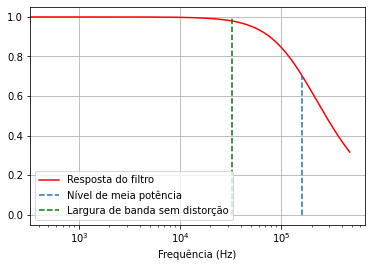

In [6]:
plt.semilogx(f,np.abs(Hf),'r-',label="Resposta do filtro")
#plt.semilogx(f,1/np.sqrt(2)*np.ones(len(Hf)),'b--', label="Nível de meia potência")  
plt.semilogx(a/(2*np.pi)*np.ones(len(Hf)),np.linspace(0,1/np.sqrt(2),len(Hf)),"--",label="Nível de meia potência")
plt.semilogx(32.31e3*np.ones(len(Hf)),np.linspace(0,1,len(Hf)),"g--",label="Largura de banda sem distorção")
plt.xlabel("Frequência (Hz)")
plt.grid()
plt.legend()
plt.show()

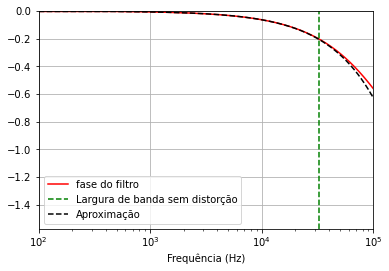

In [7]:
plt.semilogx(f,np.angle(Hf),'r-',label="fase do filtro")
plt.semilogx(32.31e3*np.ones(len(Hf)),np.linspace(-np.pi/2,0,len(Hf)),"g--",label="Largura de banda sem distorção")
plt.semilogx(f,-2*np.pi*f/a,'k--',label="Aproximação")
plt.xlabel("Frequência (Hz)")
plt.xlim([10**2,10**5])
plt.ylim([-np.pi/2,0])
plt.grid()
plt.legend()
plt.show()

<h1 style="text-align: center;">Tipos de distorção</h1>

## Distorção linear

  - Causado por um espalhamento temporal do sinal como mostrado nas figuras
  - No exemplo a seguir, a relação de entrada e saída  é expressa por
  $$
   y(t) = x(t-t_d) + \frac{k}{2}\left[x(t-t_d - T/2) + x(t-t_d - T)\right]
  $$
  - Pela expressão, é possível perceber que o é espalhado ao longo do tempo, efeito corroborado pelos gráficos

In [8]:
A = 1
fs = 500
T = 0.4
def plot_spreading(alpha,nEchos):
    t, x = rect_pulse(A,fs,T)

    plt.plot(t,x,'b',label='Sinal transmitido')
    plt.xlabel('Tempo(s)')
    plt.grid()
    plt.xlim([0,1])
    plt.legend()
    plt.show()


    k = 1
    aVec = k*np.ones(nEchos)
    aVec[1::] =  aVec[1::]/2 

    td = alpha*T
    tdVec = np.linspace(0,2*T,nEchos) + td

    y = canal_linear(x,fs,aVec,tdVec)

    plt.plot(t,x,'b',label='Sinal de entrada')
    plt.plot(t,y,'--g',label="Saída do canal")
    plt.xlabel('Tempo(s)')
    plt.grid()
    plt.xlim([0,t[-1]])
    plt.legend()
    plt.show()

a = widgets.FloatSlider(min=0,max=1,step=0.01, description="defina o atraso de propagação")
e = widgets.Dropdown(
    options=[1,2,3,4,5],
    value=1,
    description='Número de echos',
    disabled=False,

)

ui = widgets.HBox([a,e])

out = widgets.interactive_output(plot_spreading, {'alpha': a,'nEchos':e})

display(out, ui)


Output()

## Distorções não-lineares

- Em certos casos, efeitos não-lineares estão integrados em canais de comunicação.
- A relação de entrada-saída é escrita como:
$$
y(t) = f(x(t)),
$$ 
em que $f(.)$ consiste em um função de mapeamento não-linear

- Neste casos, podemos reescrever o problem em termos da série de Maclaurin
$$
y(t) = a_0 + a_1x(t)+ a_2x^2(t) + ...
$$

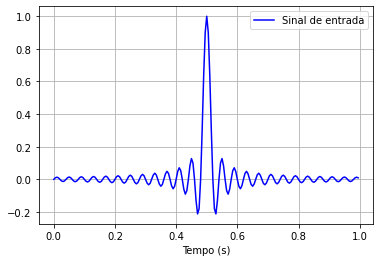

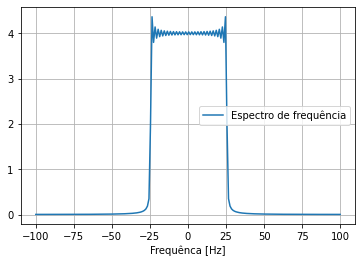

In [9]:
B  = 50
fs = 4*B
t_d = 0.5
t,x = sinc(B,fs,t_d,T_max=1)

plt.plot(t,x,'b',label='Sinal de entrada')
plt.xlabel('Tempo (s)')
plt.grid()
plt.legend()
plt.show()

f = np.linspace(-fs/2,fs/2,len(t))

Xf = np.fft.fftshift(np.fft.fft(x))
plt.plot(f,np.abs(Xf),label='Espectro de frequência')
plt.xlabel("Frequênca [Hz]")
plt.grid()
plt.legend()
plt.show()





In [10]:
def plot_canal_nlinear(idx):

    y = canal_nao_linear(x,1,idx)

    plt.plot(t,x,'b',label='Sinal de entrada')
    plt.plot(t,y,'g--',label='Sinal de saída')
    plt.xlabel('Tempo (s)')
    plt.grid()
    plt.legend()
    plt.show()


    Yf = np.fft.fftshift(np.fft.fft(y))
    plt.plot(f,np.abs(Xf),label='Espectro de frequência de x(t)')
    plt.plot(f,np.abs(Yf),label='Espectro de frequência de y(t)')
    plt.xlabel("Frequênca [Hz]")
    plt.grid()
    plt.legend()
    plt.show()

a = widgets.Dropdown(
    options=[1,2,3,4,5],
    value=1,
    description='Ordem do modelo',
    disabled=False,
)

ui = widgets.HBox([a])

out = widgets.interactive_output(plot_canal_nlinear, {'idx': a})

display(out, ui)

Output()

## Distorção de multi-percurso

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.oMO2KVnEpG-5miTbjypbTwHaFr%26pid%3DApi&f=1&ipt=45f5133aa218172f5dc3df349956381a2683917090459ddc7bef2f8754a4b0a5&ipo=images" alt="isolated"/>


Modelo de canal :

$$
h(t) = \sum _{i=0}^{N-1}k_i \delta (t - \tau _i),
$$

em que $k_i$ é atenuação correspondente ao $i$-ésimo multi percurso e $\tau _i$ é atraso relativo ao $i$-ésimo multi percurso.

<h1 style="text-align: center;">Sinais do Tipo Energia</h1>

## Definição 

A energia de um sinal $x(t)$ é dado por 

$$
E_x = \int _{-\infty}^{\infty} |x(t)|^2 dt
$$
Um sinal é chamado do tipo energia se $E_g$ possui convergência.

## Energia em função da frequência

Como definir o a energia no domínio da frequência?

$$
\begin{align*}
E_x & = \int _{-\infty}^{\infty} |x(t)|^2 dt \\
    & = \int _{-\infty}^{\infty} x(t)x^*(t) dt \\
    & = \int  _{-\infty}^{\infty} x(t) \left[  \int  _{-\infty}^{\infty}X^*(f) e^{-\jmath 2 \pi f t} df \right] dt \\
    & = \int  _{-\infty}^{\infty} X^*(f) \left[  \int  _{-\infty}^{\infty}x(t)  e^{-\jmath 2 \pi f t} dt \right] df \\
    & = \int  _{-\infty}^{\infty} X^*(f) X(f) df \\
    & = \int  _{-\infty}^{\infty} |X(f)|^2 df 
\end{align*}
$$

> Teorema de Parseval: $$ E_x = \int _{-\infty}^{\infty} |x(t)|^2 dt = \int  _{-\infty}^{\infty} |X(f)|^2 df $$

## Exemplo

Considere o o sinal $g(t) = e^{-at} u(t)$, em que $u(t)$ é uma função degrau. Calcule a energia do sinal $x(t)$ pela definição no tempo e na frequência

> Representação no tempo
$$
\begin{align*}
E_g & = \int _{0}^{\infty} e^{-2at} dt \\
    & = - \frac{1}{2a} e^{-2at} \Biggr|_{0}^{\infty} \\
    & =  - \frac{1}{2a} \left[ \lim _{t \rightarrow \infty}e^{-2at} - e^{-2a0}\right]  \\
    & =  - \frac{1}{2a} \left[ 0 - 1\right]  \\
    & =  \frac{1}{2a}
\end{align*}
$$

> Representação na frequência
$$
\begin{align*}
G(t) & = \int _{0}^{\infty}x(t) e^{-\jmath 2 \pi ft} dt \\
     &=  \frac{1}{a + \jmath 2 \pi f}
\end{align*}
$$

$$
\begin{align*}
|G(t)|^2 &=  \frac{1}{a^2 + (2 \pi f)^2}
\end{align*}
$$

$$
\begin{align*}
E_g & = \int _{-\infty}^{\infty} \frac{1}{a^2 + (2 \pi f)^2} df \\ 
    & = \frac{1}{a^2}\int _{-\infty}^{\infty} \frac{1}{1 + \left(\frac{2 \pi f}{a}\right)^2} df \\
    & = \frac{1}{a^2}\int _{-\infty}^{\infty} \frac{1}{1 + \left(u\right)^2} \left(\frac{a}{2\pi}\right) du\\
    & = \frac{1}{2\pi a}\int _{-\infty}^{\infty} \frac{1}{1 + u^2} du\\
    & = \frac{1}{2\pi a} atan \left(\frac{2 \pi f}{a} \right)\Biggr|_{-\infty}^{\infty} \\
    & = \frac{1}{2\pi a} \left[\frac{ \pi }{2} - \frac{- \pi }{2}  \right] \\
    & = \frac{1}{2 a}
\end{align*}
$$

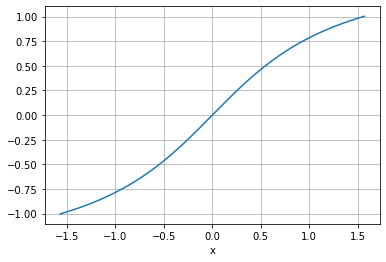

In [10]:
# Visualização do arco tangente

k = 1
x = np.linspace(-k*np.pi/2,k*np.pi/2,1000)
y = np.arctan(x)

plt.plot(x,y)
plt.xlabel('x')
plt.grid()
plt.show()

## Banda Efetiva em sinais limitados na frequência


<img src = "Figs\Sinais\signal_bandwidth.png" alt="Largura de banda">


 -  Banda effetiva: Corresponde a porção positiva da frequência ($f>0$) na qual o sinal é diferente de zero.

## Banda Efetiva em sinais limitados no tempo

 - Sinais limitados no tempo geram sinais não-limitados na frequência (Veja exemplo a seguir)
 - A banda é definida segundo o percentual de energia considerado como limiar
    - Exemplo: Considerando 90 \% da energia total é possível obter uma banda correspondente. Para o exemplo da figura isso seria em torno de $B = \frac{1}{\pi}$ Hz

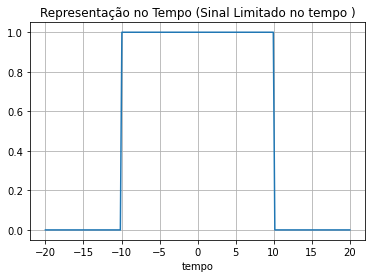

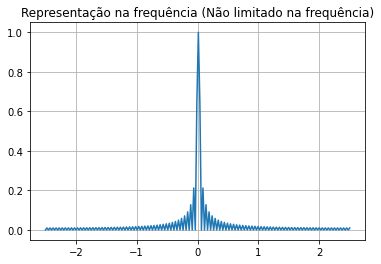

In [11]:
def rect_pulse(T,fs,Ts):

    nSamples = int(Ts*fs)
    t = np.linspace(-Ts/2,Ts/2,nSamples)

    A = [1 if abs(t[ii])<=T else 0 for ii in range(len(t))]

    return t, A

def time_plot(T,fs,Ts):

    res = rect_pulse(T,fs,Ts)
    plt.plot(*res)
    plt.xlabel("tempo") 
    plt.title("Representação no Tempo (Sinal Limitado no tempo )")
    plt.grid()
    plt.show()

def freq_plot(T,fs,Ts):
    res = rect_pulse(T,fs,Ts)
    Mf = np.fft.fftshift(np.fft.fft(res[1],norm="ortho"))
    nSamples = len(res[1])

    freq  = np.linspace(-fs/2,fs/2,nSamples)

    plt.plot(freq,abs(Mf)/np.max(abs(Mf)))
    plt.title("Representação na frequência (Não limitado na frequência)")
    #plt.xlim([-1,1])
    plt.grid()
    plt.show()

T =10  # metade da largura do pulso
fs = 5 # frequência de amostragem
Ts =40 # tempo de ssimulação


time_plot(T,fs,Ts)
freq_plot(T,fs,Ts)

## Sinais do tipo Potência


A energia de um sinal $x(t)$ é um algun problemas não converge:

$$
E_x = \int _{-\infty}^{\infty} |x(t)|^2 dt \rightarrow \infty
$$
Neste caso, é utilizado o conceito de potência

$$
P_x = \lim _{T \rightarrow \infty} \frac{1}{T}\int _{-T/2}^{T/2} |x(t)|^2 dt,
$$

o qual consiste em um média da energia ao longo do tempo.


Os resultados anteriores podem ser reescrito em função da frequência portanto é possível:

* usar o teorema de Parseval para a potência
* usar a banda efetiva em termos da potência